In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\ASUS\Desktop\Codes\Python\train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
df = df.dropna()
df = df.drop(['Cabin','PassengerId','Name'],axis=1)

In [5]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"The {col} column has {len(unique_values)} unique values: {unique_values}")

The HomePlanet column has 3 unique values: ['Europa' 'Earth' 'Mars']
The CryoSleep column has 2 unique values: [False True]
The Destination column has 3 unique values: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
The Age column has 80 unique values: [39. 24. 58. 33. 16. 44. 26. 35. 14. 45. 32. 48. 28.  0.  1. 49. 10.  7.
 15. 34. 43. 47.  2. 23. 20. 17. 55.  4. 21. 56. 25. 38. 27. 36. 22. 62.
 18. 19. 37. 42. 13. 40.  3. 54.  9.  6. 29. 64. 67. 61. 50. 31.  8. 51.
 11. 41. 30. 46. 60. 63. 57.  5. 79. 68. 59. 74. 12. 65. 53. 71. 52. 75.
 76. 78. 70. 73. 66. 69. 72. 77.]
The VIP column has 2 unique values: [False True]
The RoomService column has 1093 unique values: [   0.  109.   43. ... 1003. 8586.  745.]
The FoodCourt column has 1293 unique values: [   0.    9. 3576. ... 1146. 6819. 4688.]
The ShoppingMall column has 984 unique values: [0.0000e+00 2.5000e+01 3.7100e+02 1.5100e+02 3.0000e+00 1.7000e+01
 5.8900e+02 1.1230e+03 6.5000e+01 1.2000e+01 1.0000e+00 1.3600e+02
 8.1000e+01 1.411

In [6]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
df['HomePlanet'] = le.fit_transform(df['HomePlanet'])
df['CryoSleep'] = le.fit_transform(df['CryoSleep'])
df['Destination'] = le.fit_transform(df['Destination'])
df['VIP'] = le.fit_transform(df['VIP'])
df['Transported'] = le.fit_transform(df['Transported'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   int32  
 1   CryoSleep     6606 non-null   int32  
 2   Destination   6606 non-null   int32  
 3   Age           6606 non-null   float64
 4   VIP           6606 non-null   int32  
 5   RoomService   6606 non-null   float64
 6   FoodCourt     6606 non-null   float64
 7   ShoppingMall  6606 non-null   float64
 8   Spa           6606 non-null   float64
 9   VRDeck        6606 non-null   float64
 10  Transported   6606 non-null   int64  
dtypes: float64(6), int32(4), int64(1)
memory usage: 516.1 KB


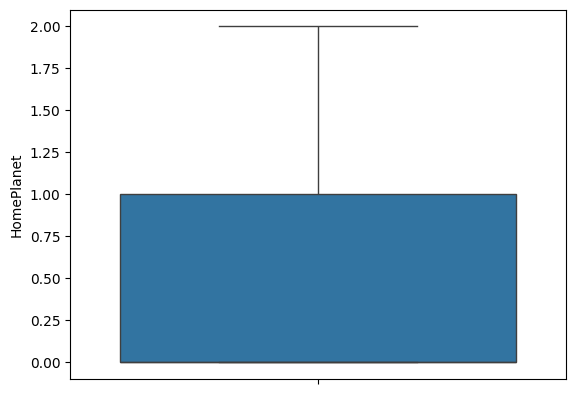

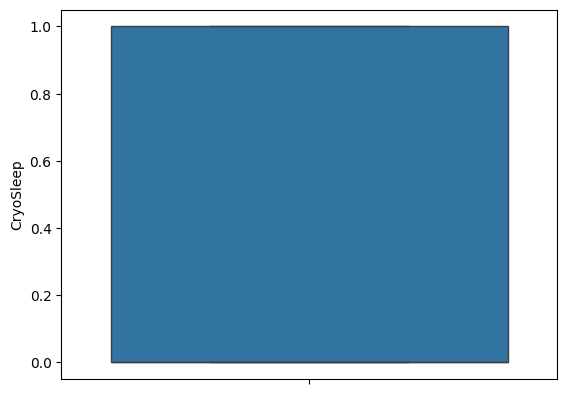

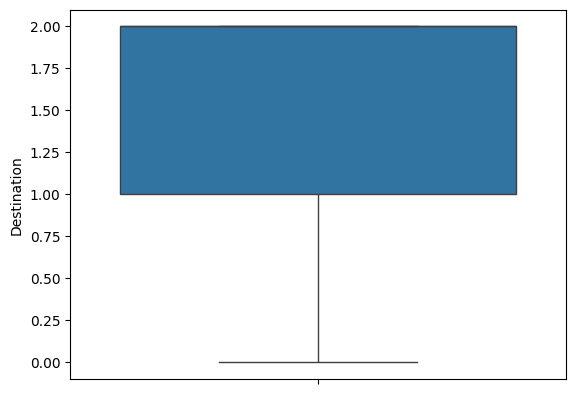

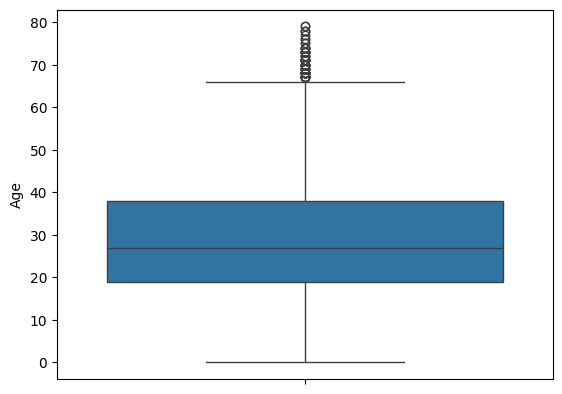

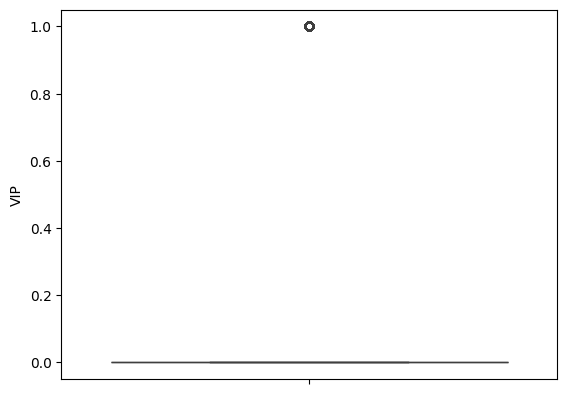

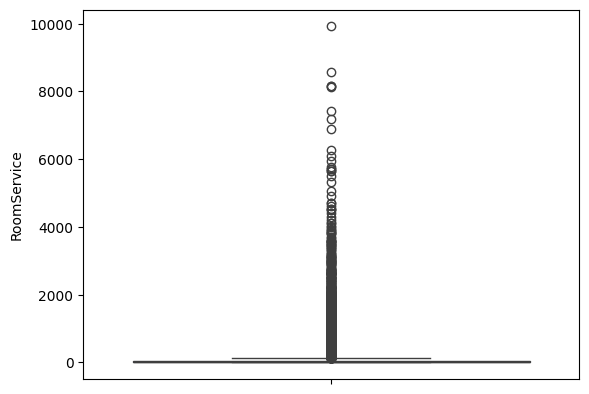

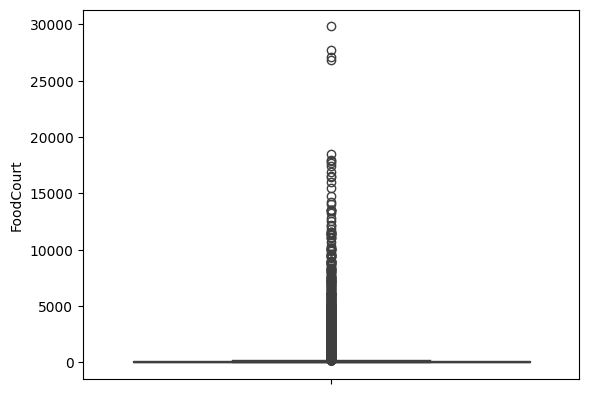

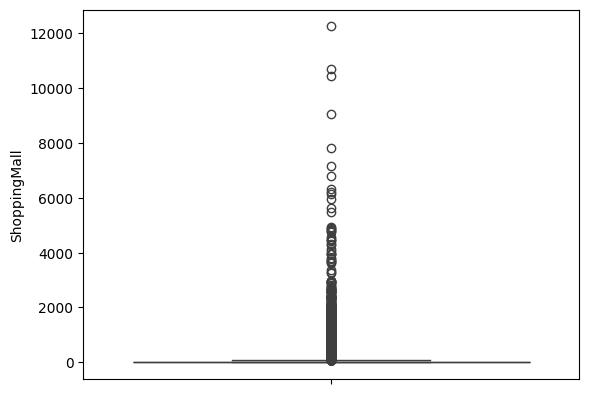

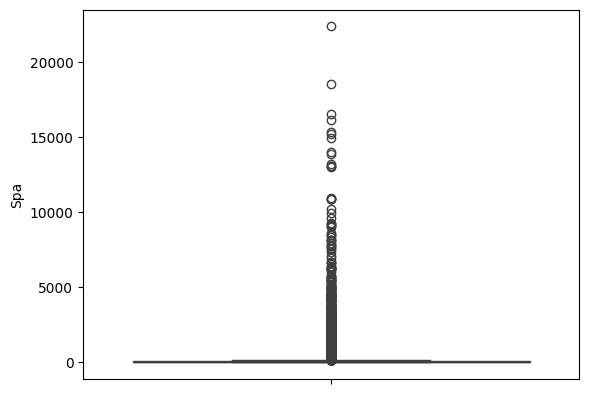

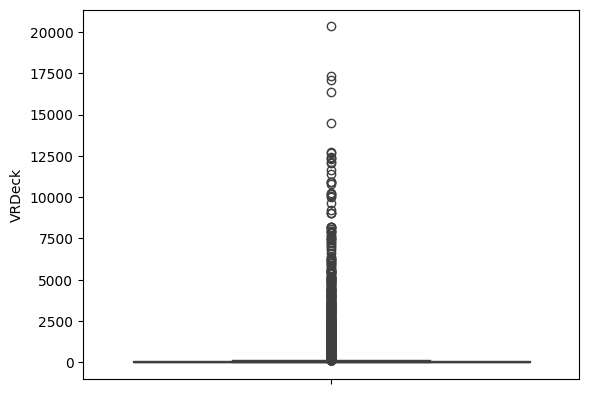

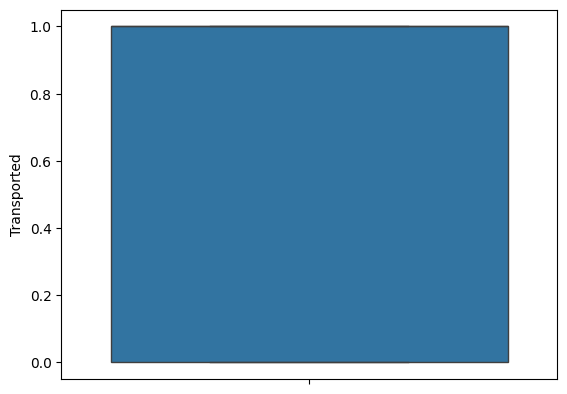

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [9]:
df.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,0.667121,0.353012,1.479715,28.894036,0.024523,222.991674,478.958523,178.356494,313.161520,303.780048,0.503633
std,0.797517,0.477943,0.821990,14.533429,0.154678,644.987936,1678.592291,576.328407,1144.016291,1127.142166,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,2.000000,38.000000,0.000000,49.000000,82.750000,30.000000,65.000000,52.000000,1.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000,1.000000


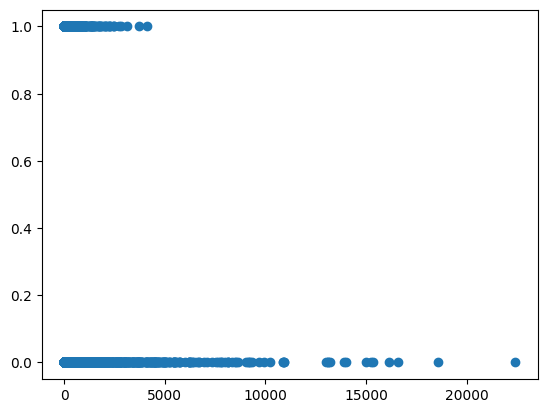

In [10]:
plt.scatter(df["Spa"],df['Transported'])
plt.show()

In [11]:
df = df[df["Spa"] < 5000]
df.Spa

0          0.0
1        549.0
3       3329.0
4        565.0
5        291.0
         ...  
8688    1643.0
8689       0.0
8690       1.0
8691     353.0
8692       0.0
Name: Spa, Length: 6534, dtype: float64

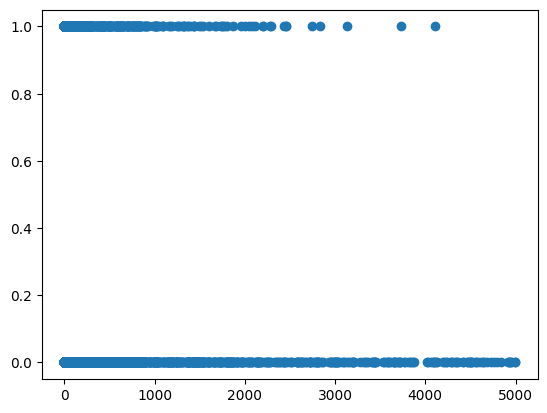

In [12]:
plt.scatter(df["Spa"],df['Transported'])
plt.show()

In [13]:
df = df[df["Age"] < 65]
df.Age

0       39.0
1       24.0
3       33.0
4       16.0
5       44.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 6454, dtype: float64

<Axes: ylabel='Age'>

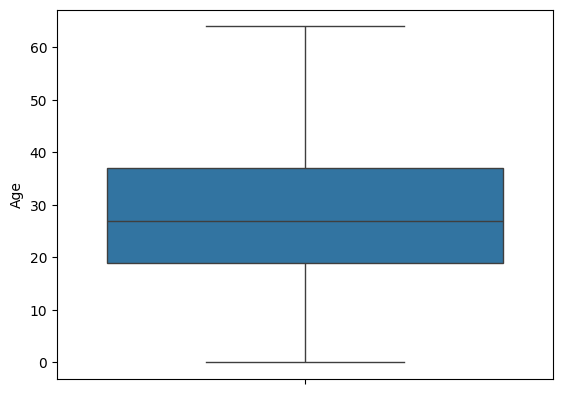

In [14]:
sns.boxplot(df["Age"])

In [15]:
from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV

x = df.drop("Transported",axis=1)
y = df["Transported"]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2024,test_size=0.2)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500,criterion="entropy",max_depth=5).fit(x_train,y_train)
model.score(x_test,y_test)

0.7955073586367157

In [22]:
kf = KFold(n_splits=10)
cv = cross_val_score(model, x, y, cv=kf)

print(f"The score is {cv}")
print(f"The mean accuracy is {cv.mean()}")

The score is [0.78947368 0.75696594 0.77244582 0.77708978 0.77829457 0.78139535
 0.79689922 0.79379845 0.80620155 0.78604651]
The mean accuracy is 0.783861089111287
